In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importing dataset
df = pd.read_csv('/content/drive/MyDrive/MiniProject/royapuram_data.csv')

In [3]:
# printing the dataset
df

,Day,Date,Time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,00:00:00,20.0,31.0,NaN,NaN,2.0,40.0,9.0,40
1,Monday,01-08-2022,01:00:00,20.0,30.0,NaN,NaN,3.0,37.0,9.0,40
2,Monday,01-08-2022,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
3,Monday,01-08-2022,03:00:00,27.0,25.0,NaN,NaN,2.0,42.0,8.0,41
4,Monday,01-08-2022,04:00:00,20.0,20.0,NaN,NaN,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...,...
739,Wednesday,31-08-2022,19:00:00,6.0,20.0,11.0,NaN,5.0,63.0,4.0,51
740,Wednesday,31-08-2022,20:00:00,12.0,13.0,19.0,NaN,6.0,86.0,6.0,56
741,Wednesday,31-08-2022,21:00:00,19.0,22.0,18.0,NaN,3.0,77.0,6.0,59
742,Wednesday,31-08-2022,22:00:00,15.0,24.0,18.0,NaN,4.0,106.0,7.0,65


In [4]:
# Finding the if columns have NA values or not
pd.isnull(df).sum()

Day        0
Date       0
Time       0
PM2.5     20
PM10      21
NO2      129
NH3      741
SO2       34
CO        23
OZONE     24
AQI        0
dtype: int64

In [5]:
# Dropping 'NH3' column as most of it's values are null
df1 = df.drop(['NH3'], axis=1)

In [6]:
df1

,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,00:00:00,20.0,31.0,NaN,2.0,40.0,9.0,40
1,Monday,01-08-2022,01:00:00,20.0,30.0,NaN,3.0,37.0,9.0,40
2,Monday,01-08-2022,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,41
3,Monday,01-08-2022,03:00:00,27.0,25.0,NaN,2.0,42.0,8.0,41
4,Monday,01-08-2022,04:00:00,20.0,20.0,NaN,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...
739,Wednesday,31-08-2022,19:00:00,6.0,20.0,11.0,5.0,63.0,4.0,51
740,Wednesday,31-08-2022,20:00:00,12.0,13.0,19.0,6.0,86.0,6.0,56
741,Wednesday,31-08-2022,21:00:00,19.0,22.0,18.0,3.0,77.0,6.0,59
742,Wednesday,31-08-2022,22:00:00,15.0,24.0,18.0,4.0,106.0,7.0,65


In [7]:
# checking for null values
pd.isnull(df1).sum()

Day        0
Date       0
Time       0
PM2.5     20
PM10      21
NO2      129
SO2       34
CO        23
OZONE     24
AQI        0
dtype: int64

In [8]:
# printing rows having any null values
df1[df1.isnull().any(axis=1)]

,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,00:00:00,20.0,31.0,NaN,2.0,40.0,9.0,40
1,Monday,01-08-2022,01:00:00,20.0,30.0,NaN,3.0,37.0,9.0,40
2,Monday,01-08-2022,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,41
3,Monday,01-08-2022,03:00:00,27.0,25.0,NaN,2.0,42.0,8.0,41
4,Monday,01-08-2022,04:00:00,20.0,20.0,NaN,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...
694,Monday,29-08-2022,22:00:00,20.0,18.0,NaN,6.0,49.0,8.0,53
695,Monday,29-08-2022,23:00:00,19.0,19.0,NaN,5.0,51.0,8.0,51
731,Wednesday,31-08-2022,11:00:00,13.0,NaN,11.0,5.0,46.0,5.0,60
732,Wednesday,31-08-2022,12:00:00,NaN,NaN,10.0,7.0,47.0,8.0,59


In [9]:
# filling the null values
df2 = df1.interpolate(method ='linear', limit_direction ='forward')

In [10]:
df2

,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,00:00:00,20.0,31.0,NaN,2.0,40.0,9.0,40
1,Monday,01-08-2022,01:00:00,20.0,30.0,NaN,3.0,37.0,9.0,40
2,Monday,01-08-2022,02:00:00,23.5,27.5,NaN,2.5,39.5,8.5,41
3,Monday,01-08-2022,03:00:00,27.0,25.0,NaN,2.0,42.0,8.0,41
4,Monday,01-08-2022,04:00:00,20.0,20.0,NaN,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...
739,Wednesday,31-08-2022,19:00:00,6.0,20.0,11.0,5.0,63.0,4.0,51
740,Wednesday,31-08-2022,20:00:00,12.0,13.0,19.0,6.0,86.0,6.0,56
741,Wednesday,31-08-2022,21:00:00,19.0,22.0,18.0,3.0,77.0,6.0,59
742,Wednesday,31-08-2022,22:00:00,15.0,24.0,18.0,4.0,106.0,7.0,65


In [11]:
# checking for null values
pd.isnull(df2).sum()

Day        0
Date       0
Time       0
PM2.5      0
PM10       0
NO2      112
SO2        0
CO         0
OZONE      0
AQI        0
dtype: int64

In [12]:
# filling no2 na values with mean of the column
no2_mean=df2['NO2'].mean()
df2['NO2'].fillna(value=no2_mean, inplace=True)

In [13]:
df2.head()

,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,00:00:00,20.0,31.0,22.647152,2.0,40.0,9.0,40
1,Monday,01-08-2022,01:00:00,20.0,30.0,22.647152,3.0,37.0,9.0,40
2,Monday,01-08-2022,02:00:00,23.5,27.5,22.647152,2.5,39.5,8.5,41
3,Monday,01-08-2022,03:00:00,27.0,25.0,22.647152,2.0,42.0,8.0,41
4,Monday,01-08-2022,04:00:00,20.0,20.0,22.647152,1.0,36.0,4.0,41


In [14]:
pd.isnull(df2).sum()

Day      0
Date     0
Time     0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
OZONE    0
AQI      0
dtype: int64

In [15]:
df2.to_csv(r'/content/drive/MyDrive/MiniProject/royapuram_model.csv', index = 'False')

In [ ]:
# finding mean of each column in the dataset having null values
df1.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


PM2.5    29.551105
PM10     57.197787
NO2      22.679675
SO2       3.987324
CO       63.208044
OZONE     8.166667
AQI      67.576613
dtype: float64

In [ ]:
# finding mean of each column not having null values
df2.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


PM2.5    29.650538
PM10     57.177419
NO2      22.647152
SO2       3.946909
CO       63.142473
OZONE     8.204973
AQI      67.576613
dtype: float64

As observed, the mean of each column has changed after filling the NA values, but not by a very significant amount

In [ ]:
corr = df2.corr()
print(corr)

          PM2.5      PM10       NO2       SO2        CO     OZONE       AQI
PM2.5  1.000000  0.634020  0.410742  0.071526  0.363267  0.002307  0.161999
PM10   0.634020  1.000000  0.490972  0.005863  0.498783 -0.012208  0.445516
NO2    0.410742  0.490972  1.000000  0.088169  0.531402  0.047260  0.295714
SO2    0.071526  0.005863  0.088169  1.000000  0.027214  0.032783 -0.038080
CO     0.363267  0.498783  0.531402  0.027214  1.000000  0.048755  0.343916
OZONE  0.002307 -0.012208  0.047260  0.032783  0.048755  1.000000 -0.039908
AQI    0.161999  0.445516  0.295714 -0.038080  0.343916 -0.039908  1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


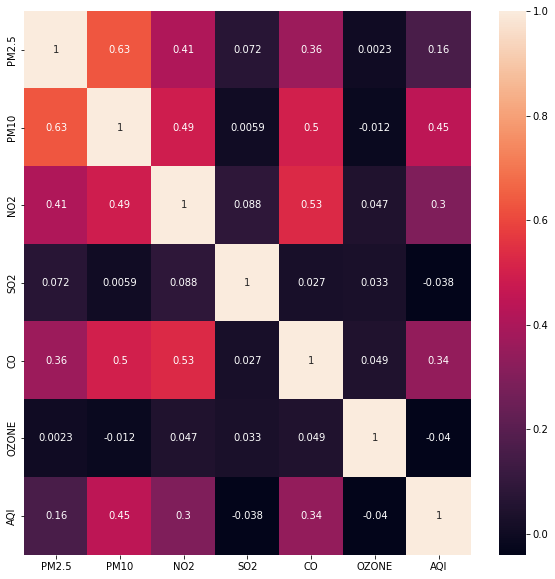

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr_plot = sns.heatmap(corr, annot = True, ax=ax)
print(corr_plot)

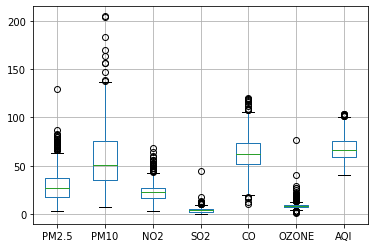

In [ ]:
df2.boxplot()

## Hourly data

Working on hourly data and plotting graphs for each column

In [ ]:
# function to plot each column
def plot_points(col_name):
  fig = plt.figure(figsize =(30, 10))
  for i in range(0,len(df2), 24):
      plt.plot(df2.loc[range(i+0,i+24), col_name])
  print('The hour(s) with max {} is \n{}\n'.format(col_name, df2[df2[col_name] == df2[col_name].max()]))
  print('The hour(s) with min {} is \n{}\n'.format(col_name, df2[df2[col_name] == df2[col_name].min()]))

The hour(s) with max PM2.5 is 
          Day        Date      Time  PM2.5   PM10        NO2  SO2     CO  \
71  Wednesday  03-08-2022  23:00:00  130.0  118.0  22.647152  3.0  101.0   

    OZONE  AQI  
71    8.0   71  

The hour(s) with min PM2.5 is 
        Day        Date      Time  PM2.5  PM10  NO2  SO2    CO  OZONE  AQI
507  Monday  22-08-2022  03:00:00    3.0   7.0  6.0  1.0  49.0    8.0   63



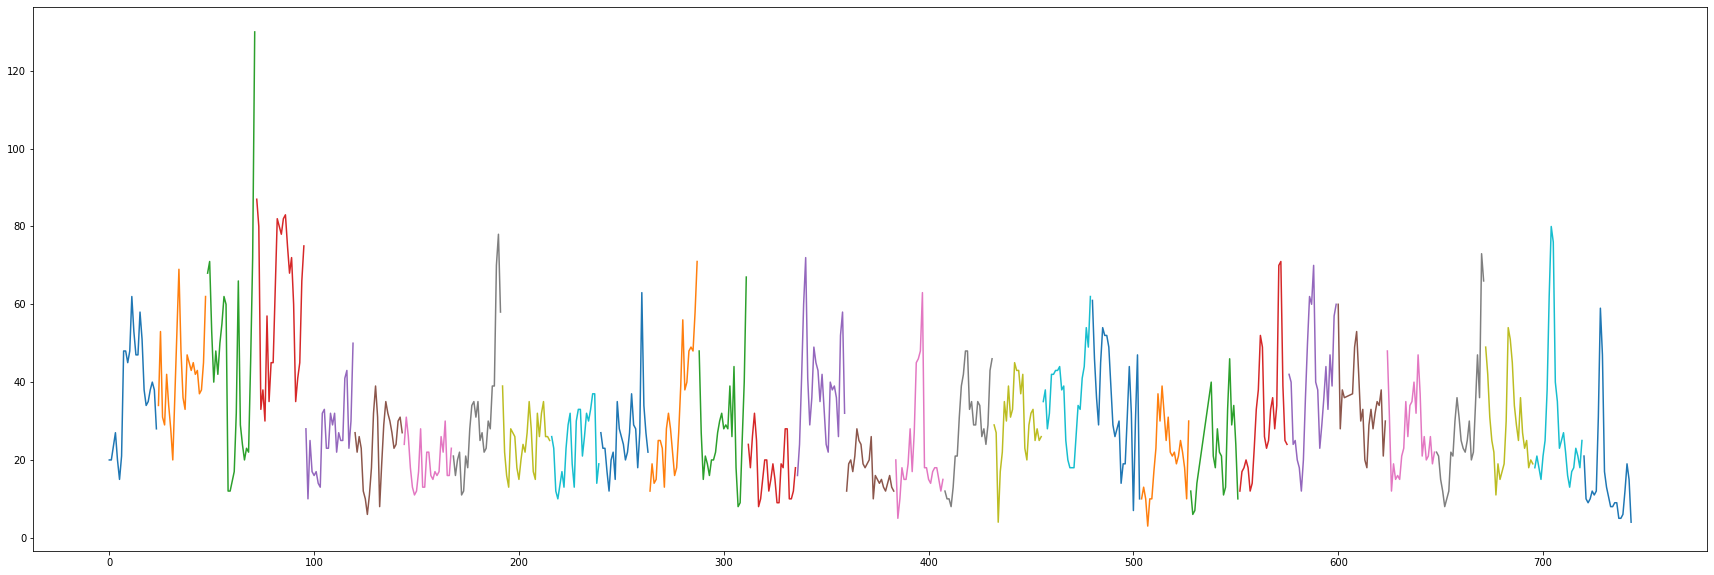

In [ ]:
plot_points('PM2.5')

The hour(s) with max PM10 is 
         Day        Date      Time  PM2.5   PM10        NO2  SO2     CO  \
85  Thursday  04-08-2022  13:00:00   82.0  205.0  22.647152  5.0  103.0   

    OZONE  AQI  
85    8.0   86  

The hour(s) with min PM10 is 
        Day        Date      Time  PM2.5  PM10  NO2  SO2    CO  OZONE  AQI
507  Monday  22-08-2022  03:00:00    3.0   7.0  6.0  1.0  49.0    8.0   63



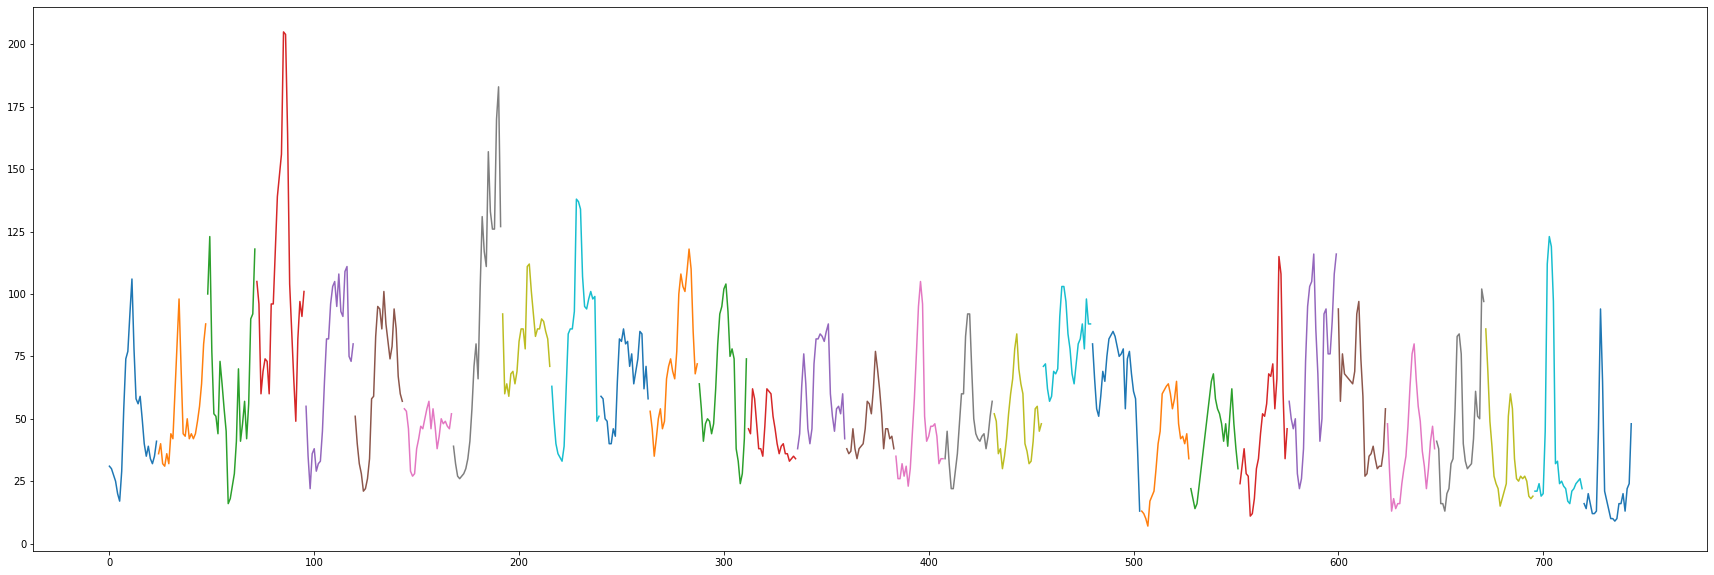

In [ ]:
plot_points('PM10')

The hour(s) with max NO2 is 
           Day        Date      Time  PM2.5   PM10   NO2  SO2    CO  OZONE  \
572  Wednesday  24-08-2022  20:00:00   71.0  108.0  68.0  5.0  81.0    9.0   

     AQI  
572   84  

The hour(s) with min NO2 is 
           Day        Date      Time  PM2.5  PM10  NO2  SO2    CO  OZONE  AQI
385  Wednesday  17-08-2022  01:00:00    5.0  26.0  3.0  2.0  48.0    8.0   56
708    Tuesday  30-08-2022  12:00:00   23.0  24.0  3.0  9.0  49.0    8.0   65



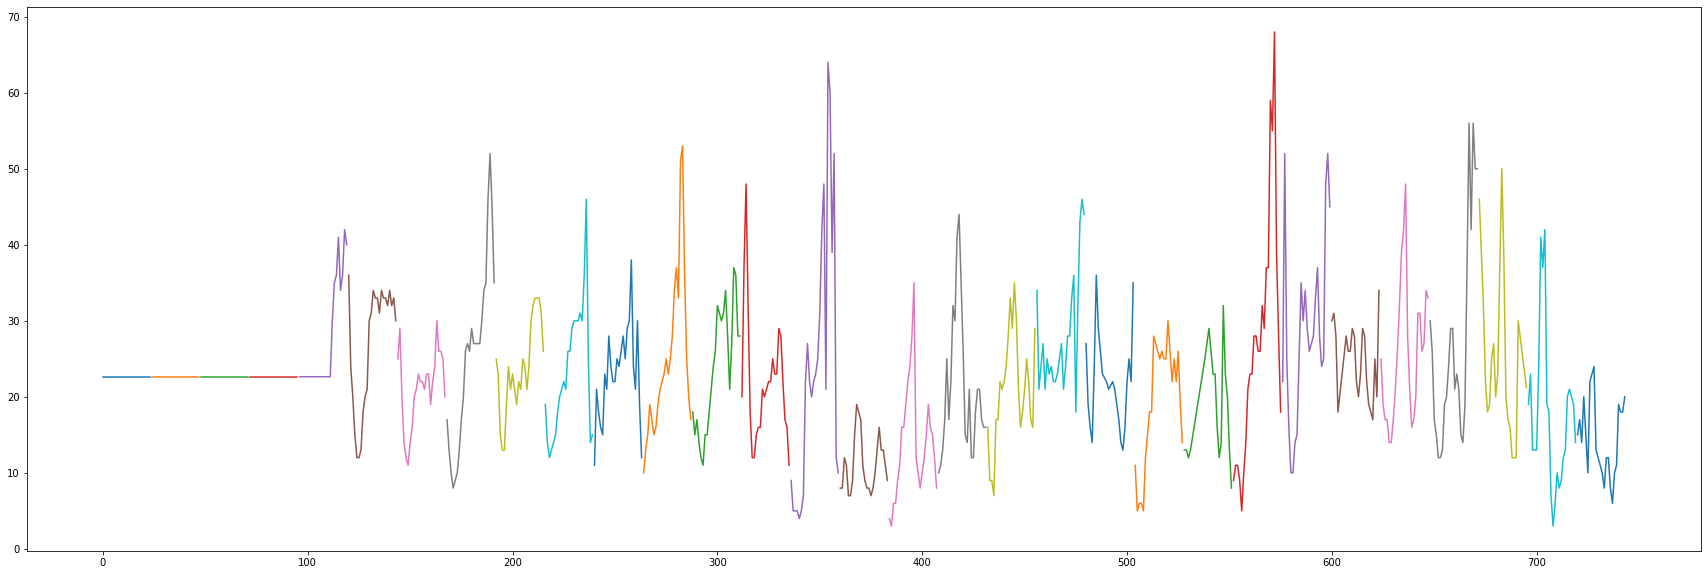

In [ ]:
plot_points('NO2')

The hour(s) with max SO2 is 
          Day        Date      Time  PM2.5  PM10   NO2   SO2    CO  OZONE  AQI
419  Thursday  18-08-2022  11:00:00   48.0  92.0  35.0  44.0  75.0   10.0   65

The hour(s) with min SO2 is 
           Day        Date      Time  PM2.5   PM10        NO2  SO2     CO  \
43     Tuesday  02-08-2022  19:00:00   43.0   49.0  22.647152  0.0   55.0   
44     Tuesday  02-08-2022  20:00:00   37.0   55.0  22.647152  0.0   64.0   
116     Friday  05-08-2022  20:00:00   43.0  111.0  34.000000  0.0  103.0   
298   Saturday  13-08-2022  10:00:00   30.0   92.0  24.000000  0.0   63.0   
299   Saturday  13-08-2022  11:00:00   32.0   95.0  26.000000  0.0   69.0   
389  Wednesday  17-08-2022  05:00:00   15.0   31.0  11.000000  0.0   51.0   
390  Wednesday  17-08-2022  06:00:00   19.0   23.0  16.000000  0.0   53.0   
440     Friday  19-08-2022  08:00:00   31.0   60.0  22.000000  0.0   55.0   
441     Friday  19-08-2022  09:00:00   33.0   66.0  24.000000  0.0   68.0   
483     Sunda

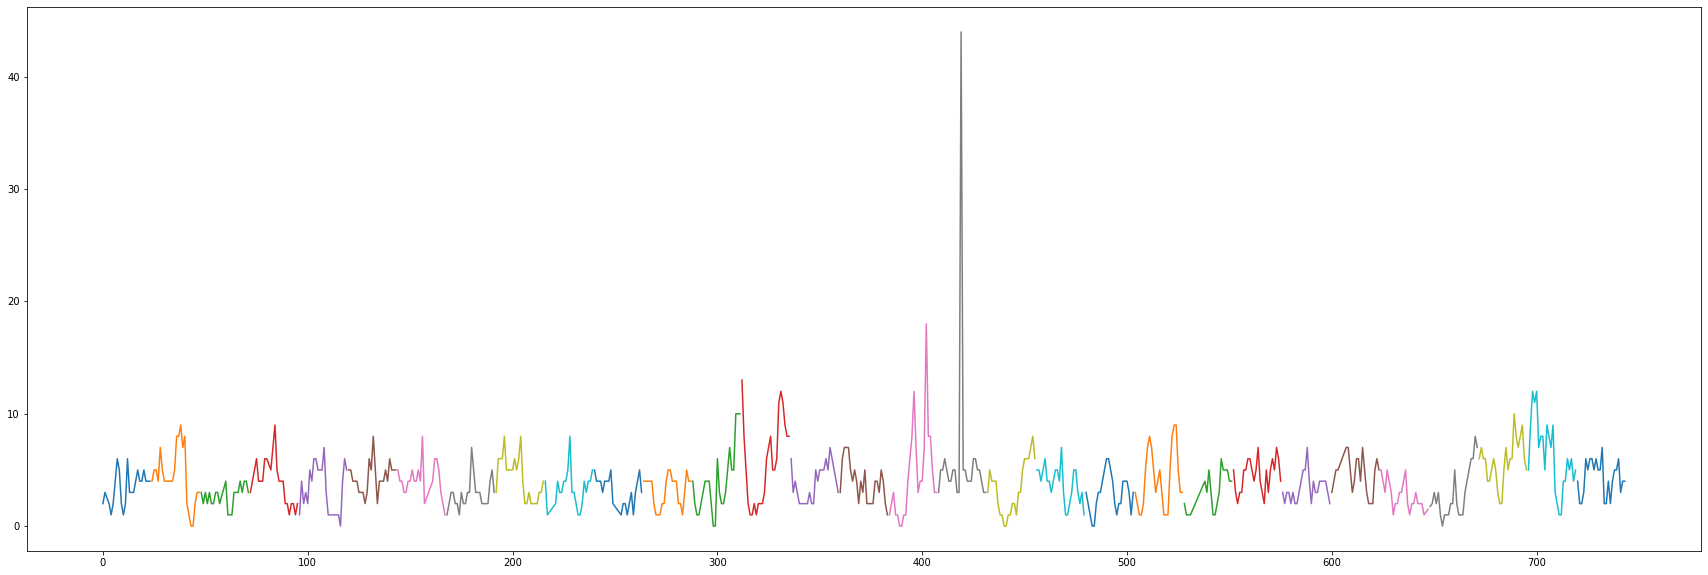

In [ ]:
plot_points('SO2')

The hour(s) with max CO is 
         Day        Date      Time  PM2.5   PM10   NO2  SO2     CO  OZONE  AQI
205  Tuesday  09-08-2022  13:00:00   35.0  112.0  25.0  4.0  120.0    9.0  103

The hour(s) with min CO is 
          Day        Date      Time  PM2.5  PM10   NO2  SO2    CO  OZONE  AQI
242  Thursday  11-08-2022  02:00:00   23.0  50.0  18.0  4.0  10.0   16.0   82



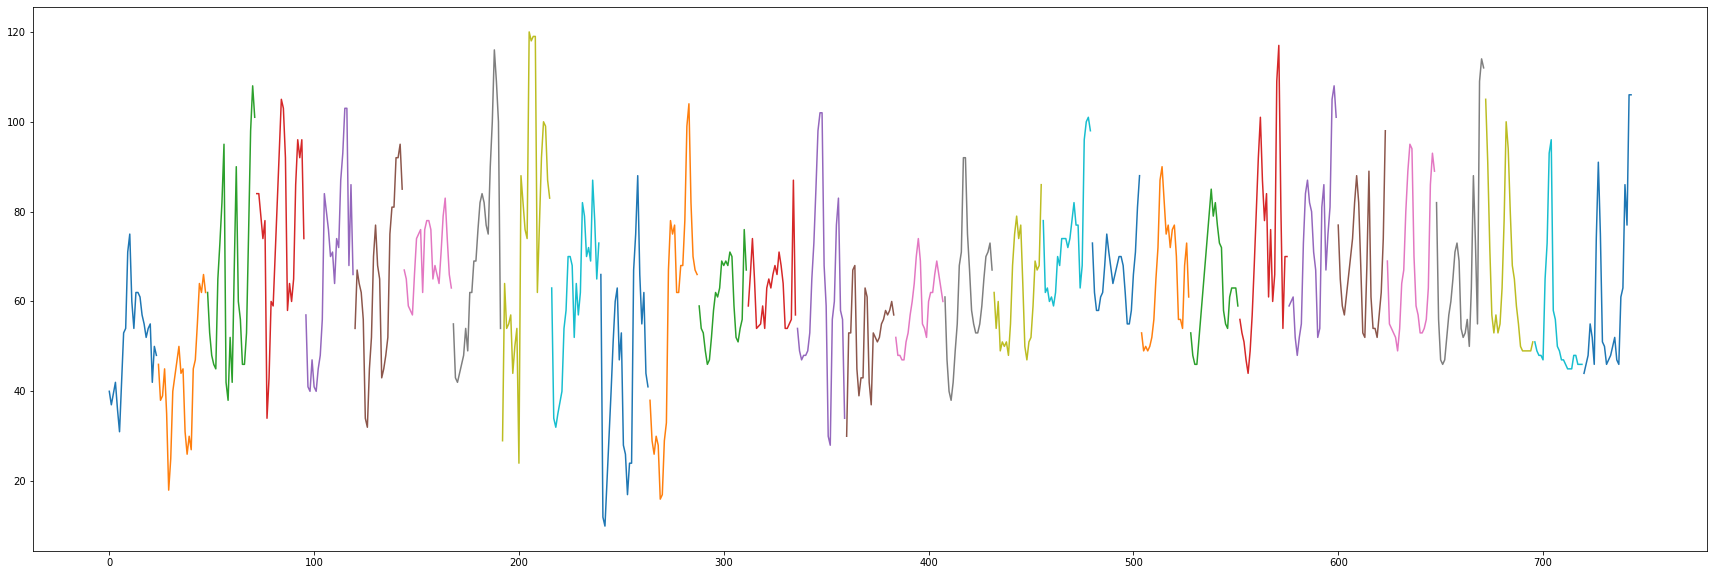

In [ ]:
plot_points('CO')

The hour(s) with max OZONE is 
          Day        Date      Time  PM2.5  PM10   NO2  SO2    CO  OZONE  AQI
413  Thursday  18-08-2022  05:00:00   21.0  29.0  17.0  4.0  49.0   77.0   52

The hour(s) with min OZONE is 
        Day        Date      Time  PM2.5  PM10  NO2  SO2    CO  OZONE  AQI
508  Monday  22-08-2022  04:00:00   10.0  17.0  5.0  2.0  50.0    1.0   62



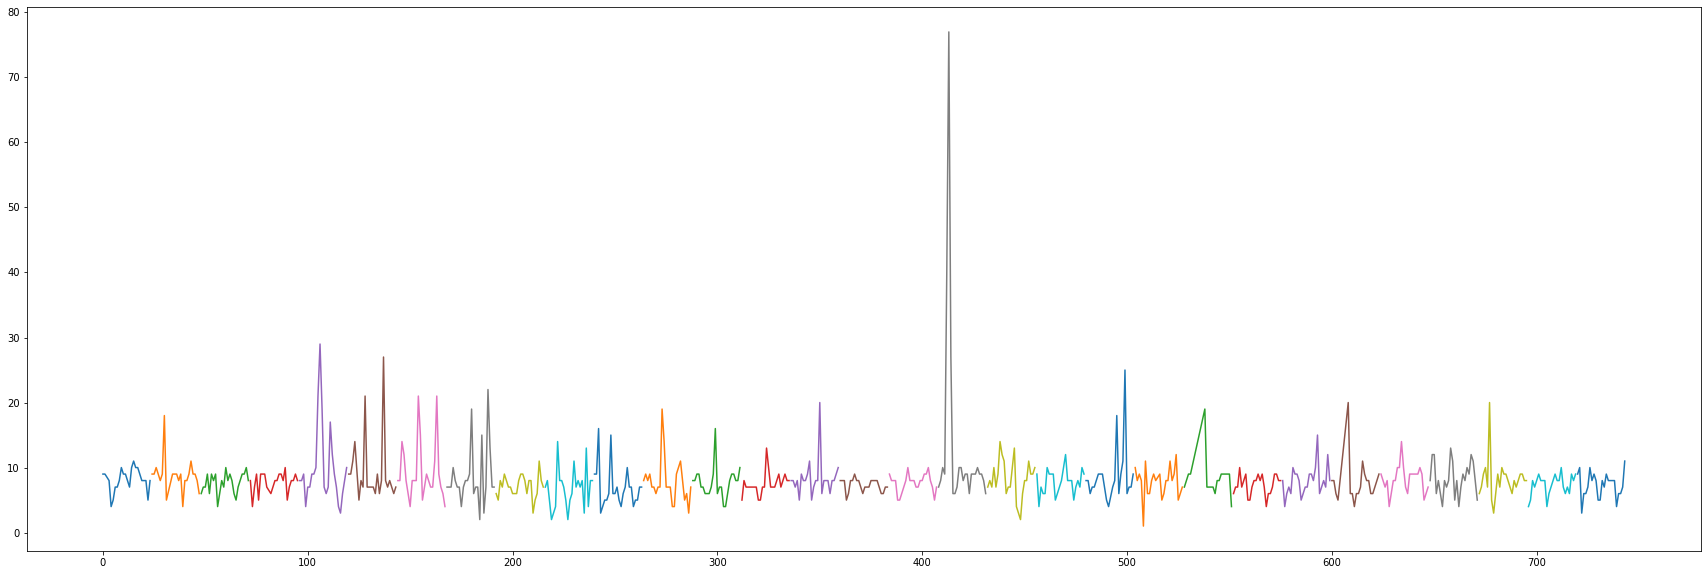

In [ ]:
plot_points('OZONE')

The hour(s) with max AQI is 
         Day        Date      Time  PM2.5  PM10        NO2  SO2    CO  OZONE  \
92  Thursday  04-08-2022  20:00:00   41.0  82.0  22.647152  2.0  96.0    8.0   
93  Thursday  04-08-2022  21:00:00   45.0  97.0  22.647152  2.0  92.0    8.0   
94  Thursday  04-08-2022  22:00:00   66.0  91.0  22.647152  1.0  96.0    9.0   

    AQI  
92  104  
93  104  
94  104  

The hour(s) with min AQI is 
      Day        Date      Time  PM2.5  PM10        NO2  SO2    CO  OZONE  AQI
0  Monday  01-08-2022  00:00:00   20.0  31.0  22.647152  2.0  40.0    9.0   40
1  Monday  01-08-2022  01:00:00   20.0  30.0  22.647152  3.0  37.0    9.0   40



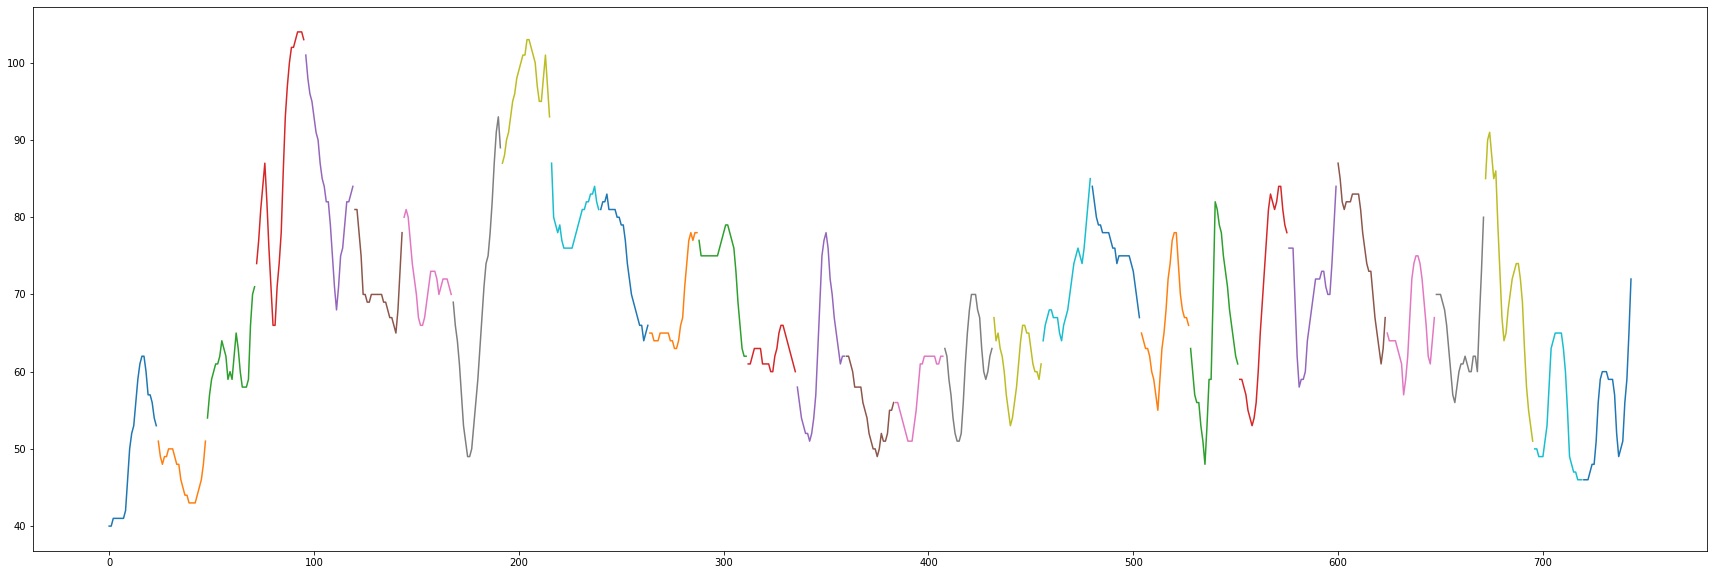

In [ ]:
plot_points('AQI')

## Daily data

Working on daily data

In [ ]:
# making a new dataframe to fill with daily data instead of hourly data
df_daily = pd.DataFrame(columns=['DAY', 'DATE', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'OZONE', 'AQI'])

Converting hourly data to daily data by finding the mean values of each day (i.e. mean value of 24 rows each)

In [ ]:
# finding dates of each day in the dataset
dates = df2['Date'].unique()

In [ ]:
dates, len(dates)

(array(['01-08-2022', '02-08-2022', '03-08-2022', '04-08-2022',
        '05-08-2022', '06-08-2022', '07-08-2022', '08-08-2022',
        '09-08-2022', '10-08-2022', '11-08-2022', '12-08-2022',
        '13-08-2022', '14-08-2022', '15-08-2022', '16-08-2022',
        '17-08-2022', '18-08-2022', '19-08-2022', '20-08-2022',
        '21-08-2022', '22-08-2022', '23-08-2022', '24-08-2022',
        '25-08-2022', '26-08-2022', '27-08-2022', '28-08-2022',
        '29-08-2022', '30-08-2022', '31-08-2022'], dtype=object), 31)

In [ ]:
days_list = []

In [ ]:
# making a list of each day occured in the dataset
count = 0
for i in range (0,len(df2),24):
  count = count+1
  days_list.append(df2.iloc[0+i, [0]].values)
print('The number of days are: {}'.format(count))

The number of days are: 31


In [ ]:
days_list

[array(['Monday'], dtype=object),
 array(['Tuesday'], dtype=object),
 array(['Wednesday'], dtype=object),
 array(['Thursday'], dtype=object),
 array(['Friday'], dtype=object),
 array(['Saturday'], dtype=object),
 array(['Sunday'], dtype=object),
 array(['Monday'], dtype=object),
 array(['Tuesday'], dtype=object),
 array(['Wednesday'], dtype=object),
 array(['Thursday'], dtype=object),
 array(['Friday'], dtype=object),
 array(['Saturday'], dtype=object),
 array(['Sunday'], dtype=object),
 array(['Monday'], dtype=object),
 array(['Tuesday'], dtype=object),
 array(['Wednesday'], dtype=object),
 array(['Thursday'], dtype=object),
 array(['Friday'], dtype=object),
 array(['Saturday'], dtype=object),
 array(['Sunday'], dtype=object),
 array(['Monday'], dtype=object),
 array(['Tuesday'], dtype=object),
 array(['Wednesday'], dtype=object),
 array(['Thursday'], dtype=object),
 array(['Friday'], dtype=object),
 array(['Saturday'], dtype=object),
 array(['Sunday'], dtype=object),
 array(['Monday'

In [ ]:
# converting the list to a numpy array
days_array = np.asarray(days_list)

In [ ]:
days_array

array([['Monday'],
       ['Tuesday'],
       ['Wednesday'],
       ['Thursday'],
       ['Friday'],
       ['Saturday'],
       ['Sunday'],
       ['Monday'],
       ['Tuesday'],
       ['Wednesday'],
       ['Thursday'],
       ['Friday'],
       ['Saturday'],
       ['Sunday'],
       ['Monday'],
       ['Tuesday'],
       ['Wednesday'],
       ['Thursday'],
       ['Friday'],
       ['Saturday'],
       ['Sunday'],
       ['Monday'],
       ['Tuesday'],
       ['Wednesday'],
       ['Thursday'],
       ['Friday'],
       ['Saturday'],
       ['Sunday'],
       ['Monday'],
       ['Tuesday'],
       ['Wednesday']], dtype=object)

In [ ]:
# Converting the 2D array to 1D array
days_array.flatten()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [ ]:
df_daily['DATE'] = dates

In [ ]:
df_daily['DAY'] = days_array

In [ ]:
# function to fill the pollutants columns by finding the mean of each day
def fill_df(cname,cval):
  lst = []
  for i in range (0,len(df2),24):
    lst.append(df2.iloc[0+i:24+i , [cval]].mean().values)

  arr = np.asarray(lst)

  arr.flatten()
  df_daily[cname] = arr

In [ ]:
df2.columns

Index(['Day', 'Date', 'Time', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'OZONE',
       'AQI'],
      dtype='object')

In [ ]:
fill_df('PM2.5', 3)
fill_df('PM10', 4)
fill_df('NO2', 5)
fill_df('SO2', 6)
fill_df('CO', 7)
fill_df('OZONE', 8)
fill_df('AQI', 9)

In [ ]:
df_daily.head()

,DAY,DATE,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,Monday,01-08-2022,37.687500,47.479167,22.647152,3.395833,51.354167,8.145833,50.250000
1,Tuesday,02-08-2022,41.375000,51.916667,22.647152,4.416667,42.916667,8.625000,46.916667
2,Wednesday,03-08-2022,44.479167,59.291667,22.647152,2.708333,64.291667,7.625000,61.291667
3,Thursday,04-08-2022,60.645833,105.708333,22.647152,4.062500,76.333333,7.645833,86.875000
4,Friday,05-08-2022,26.250000,70.541667,27.348101,3.291667,67.166667,9.833333,83.708333


In [ ]:
# function to print the value of the column on top of it
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],2), ha = 'center')

In [ ]:
# function to plot the bar graphs of each pollutant
def plot_graph(name):
  fig = plt.figure(figsize =(30, 10))
  plt.xlabel('Dates')
  plt.ylabel(name)
  plt.xticks(rotation = 60)
  addlabels(df_daily['DATE'], df_daily[name])
  plt.bar(df_daily['DATE'], df_daily[name])

  print('The date with max {} is \n{}\n'.format(name, df_daily[df_daily[name] == df_daily[name].max()]))
  print('The date with min {} is \n{}\n'.format(name, df_daily[df_daily[name] == df_daily[name].min()]))

The date with max PM2.5 is 
        DAY        DATE      PM2.5        PM10        NO2     SO2         CO  \
3  Thursday  04-08-2022  60.645833  105.708333  22.647152  4.0625  76.333333   

      OZONE     AQI  
3  7.645833  86.875  

The date with min PM2.5 is 
          DAY        DATE      PM2.5   PM10   NO2       SO2      CO     OZONE  \
30  Wednesday  31-08-2022  15.104167  23.25  14.5  4.291667  61.125  7.333333   

          AQI  
30  54.791667  



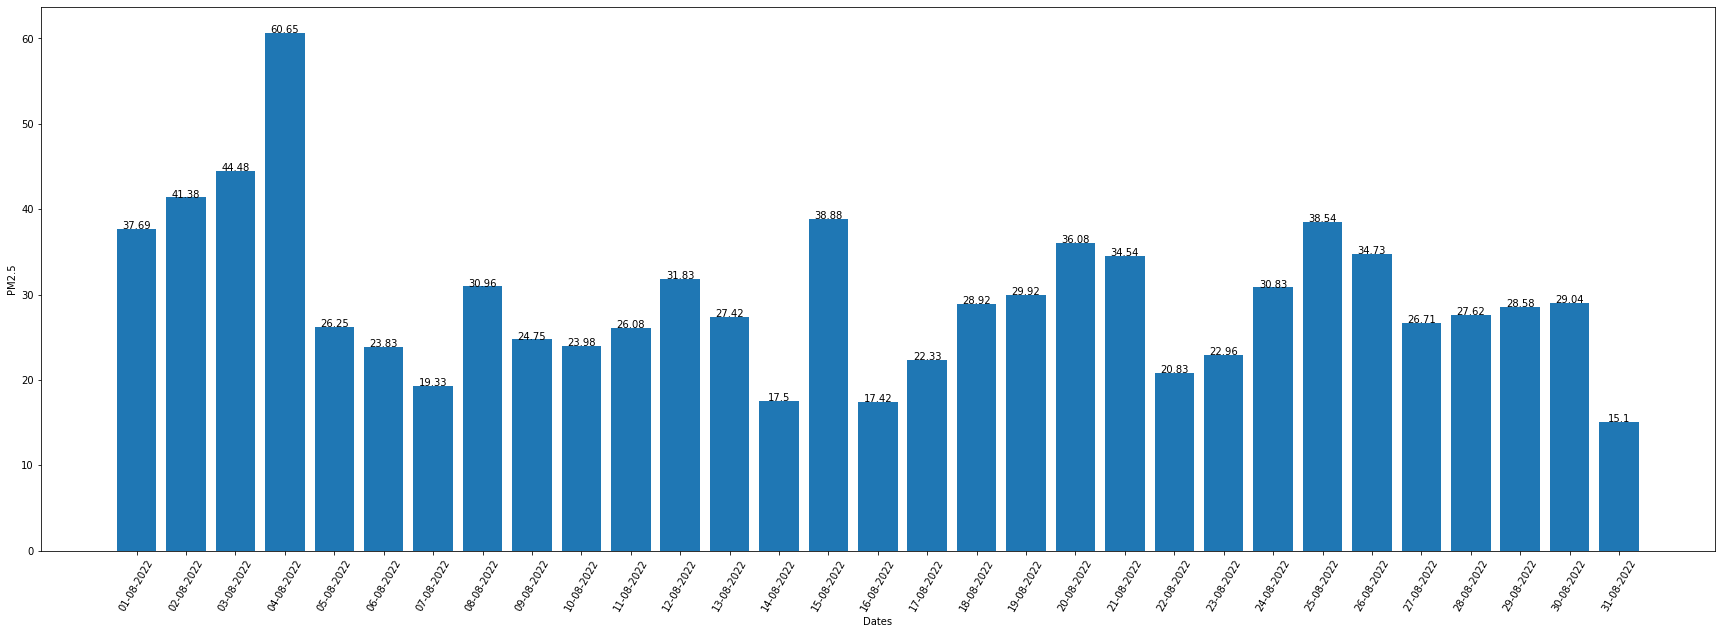

In [ ]:
plot_graph('PM2.5')

The date with max PM10 is 
        DAY        DATE      PM2.5        PM10        NO2     SO2         CO  \
3  Thursday  04-08-2022  60.645833  105.708333  22.647152  4.0625  76.333333   

      OZONE     AQI  
3  7.645833  86.875  

The date with min PM10 is 
          DAY        DATE      PM2.5   PM10   NO2       SO2      CO     OZONE  \
30  Wednesday  31-08-2022  15.104167  23.25  14.5  4.291667  61.125  7.333333   

          AQI  
30  54.791667  



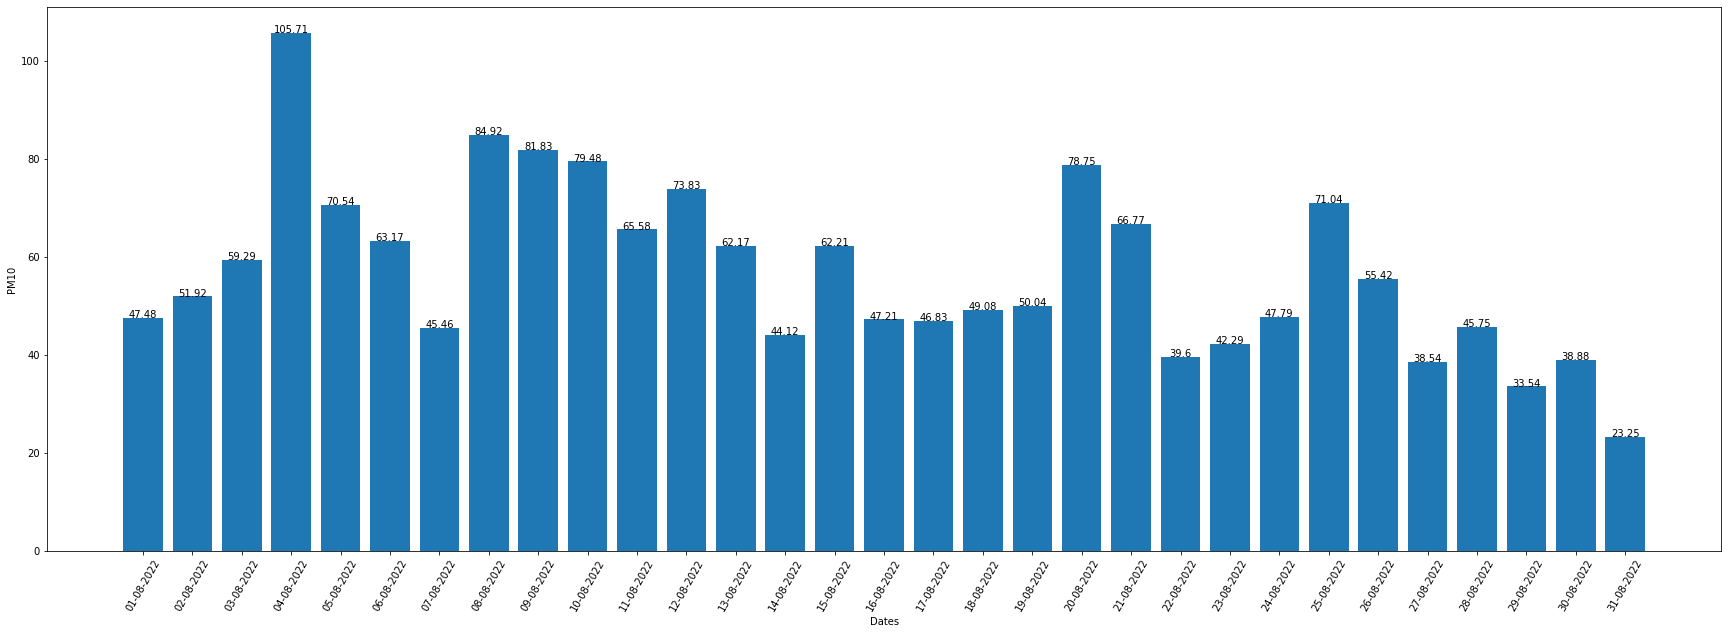

In [ ]:
plot_graph('PM10')

The date with max NO2 is 
         DAY        DATE      PM2.5       PM10    NO2    SO2         CO  \
24  Thursday  25-08-2022  38.541667  71.041667  28.75  3.375  72.541667   

       OZONE        AQI  
24  7.958333  69.708333  

The date with min NO2 is 
        DAY        DATE      PM2.5       PM10     NO2    SO2         CO  \
15  Tuesday  16-08-2022  17.416667  47.208333  11.125  3.875  52.208333   

       OZONE        AQI  
15  7.291667  54.833333  



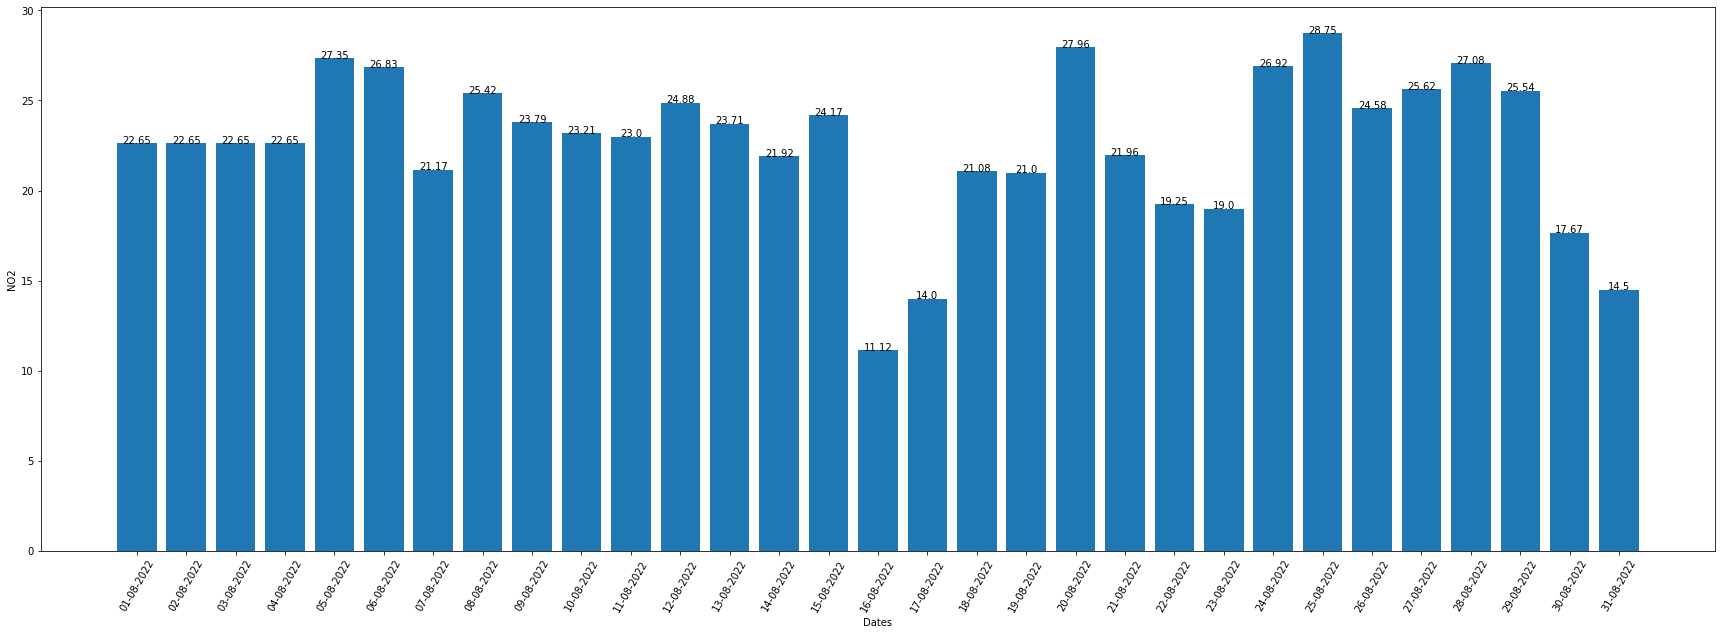

In [ ]:
plot_graph('NO2')

The date with max SO2 is 
        DAY        DATE      PM2.5    PM10        NO2       SO2         CO  \
29  Tuesday  30-08-2022  29.041667  38.875  17.666667  6.291667  53.833333   

    OZONE        AQI  
29  7.375  54.291667  

The date with min SO2 is 
         DAY        DATE      PM2.5       PM10     NO2      SO2    CO  \
26  Saturday  27-08-2022  26.708333  38.541667  25.625  2.65625  67.0   

       OZONE        AQI  
26  8.208333  65.958333  



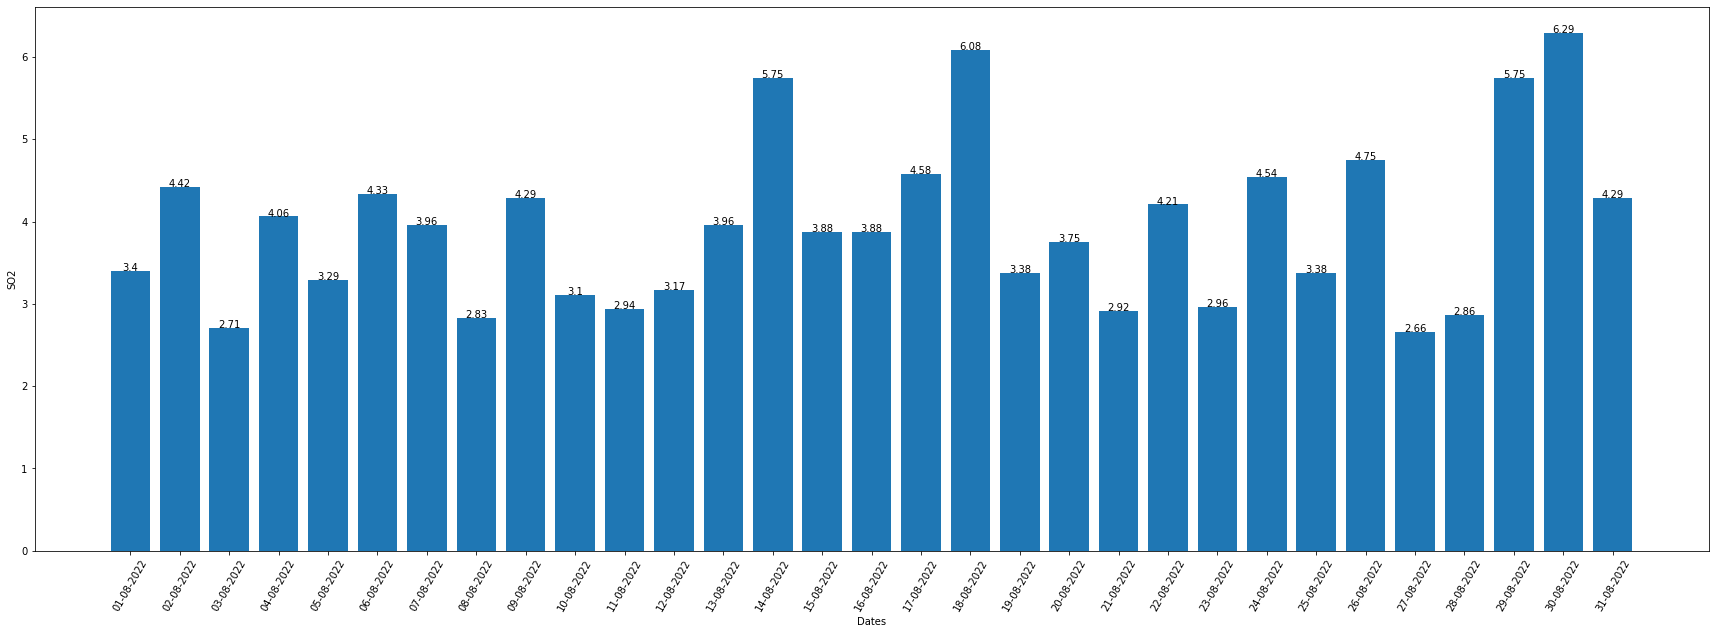

In [ ]:
plot_graph('SO2')

The date with max CO is 
        DAY        DATE      PM2.5        PM10        NO2     SO2         CO  \
3  Thursday  04-08-2022  60.645833  105.708333  22.647152  4.0625  76.333333   

      OZONE     AQI  
3  7.645833  86.875  

The date with min CO is 
       DAY        DATE   PM2.5       PM10        NO2       SO2         CO  \
1  Tuesday  02-08-2022  41.375  51.916667  22.647152  4.416667  42.916667   

   OZONE        AQI  
1  8.625  46.916667  



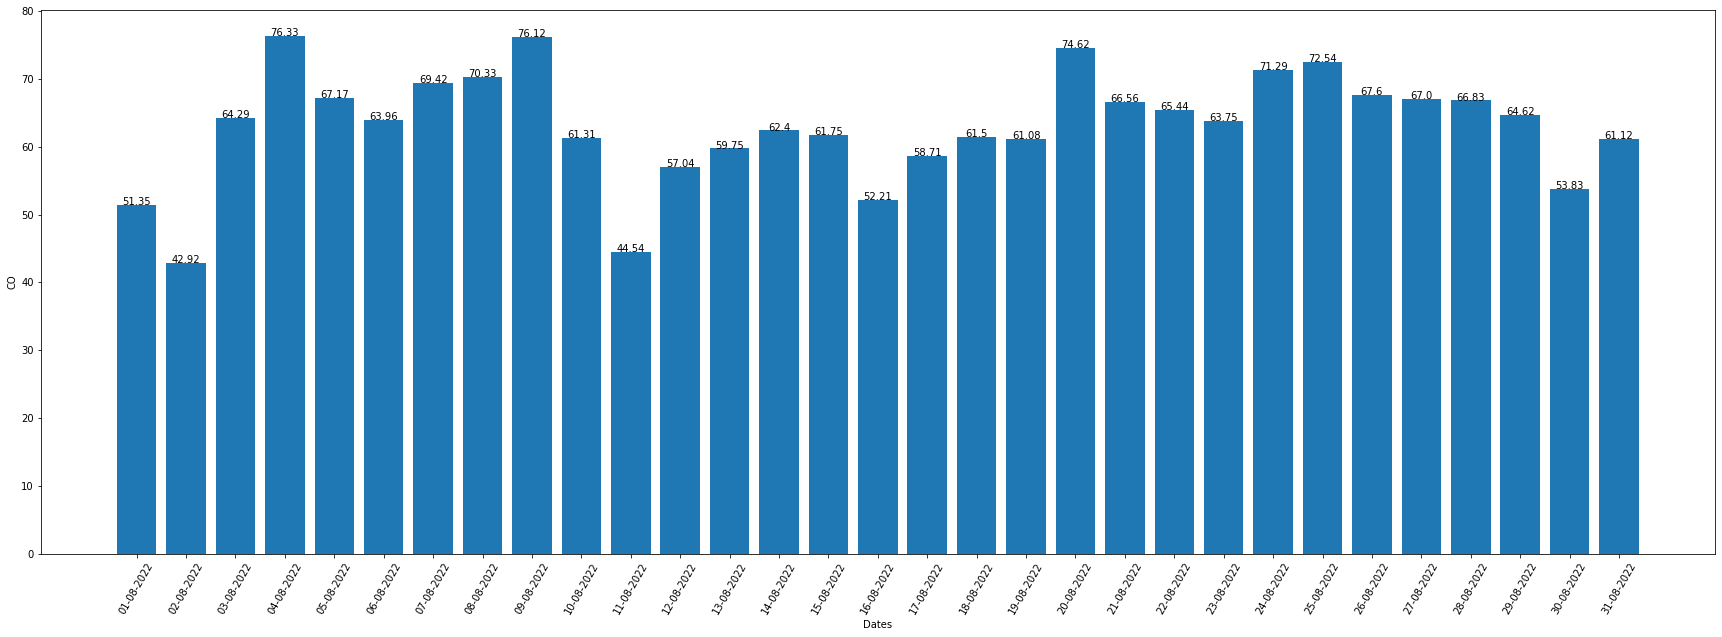

In [ ]:
plot_graph('CO')

The date with max OZONE is 
         DAY        DATE      PM2.5       PM10        NO2       SO2    CO  \
17  Thursday  18-08-2022  28.916667  49.083333  21.083333  6.083333  61.5   

    OZONE        AQI  
17  13.25  60.958333  

The date with min OZONE is 
         DAY        DATE      PM2.5       PM10        NO2       SO2       CO  \
9  Wednesday  10-08-2022  23.979167  79.479167  23.208333  3.104167  61.3125   

      OZONE        AQI  
9  6.708333  79.708333  



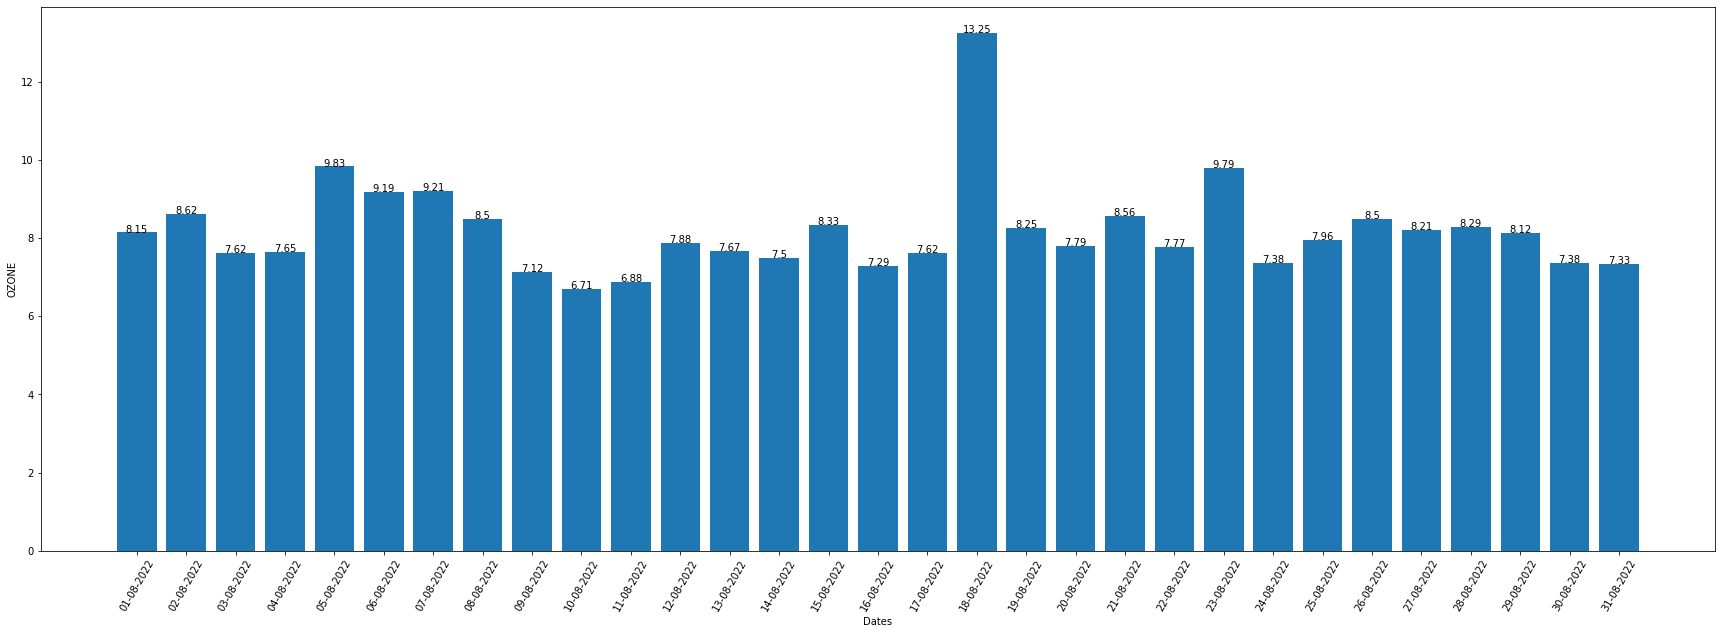

In [ ]:
plot_graph('OZONE')

The date with max AQI is 
       DAY        DATE  PM2.5       PM10        NO2       SO2      CO  OZONE  \
8  Tuesday  09-08-2022  24.75  81.833333  23.791667  4.291667  76.125  7.125   

         AQI  
8  96.833333  

The date with min AQI is 
       DAY        DATE   PM2.5       PM10        NO2       SO2         CO  \
1  Tuesday  02-08-2022  41.375  51.916667  22.647152  4.416667  42.916667   

   OZONE        AQI  
1  8.625  46.916667  



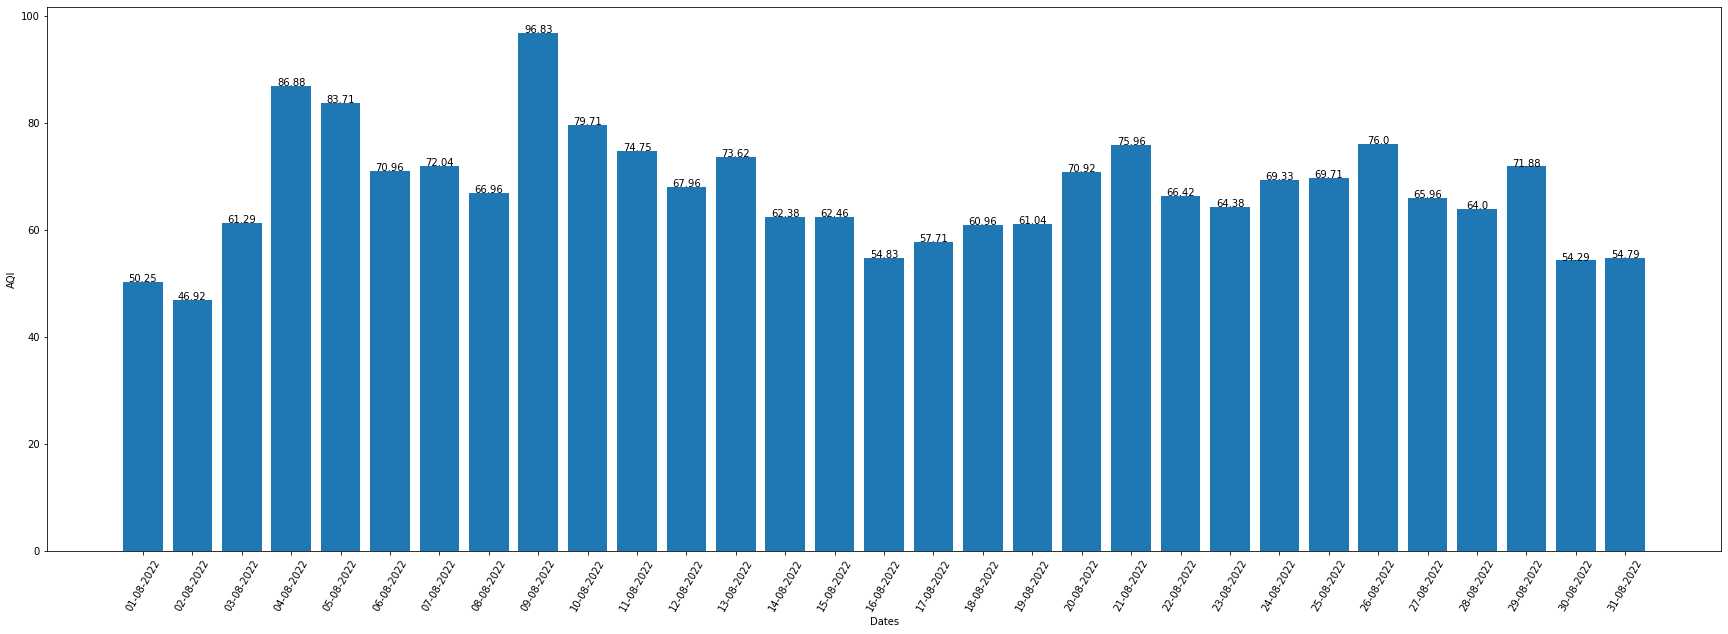

In [ ]:
plot_graph('AQI')

In [ ]:
df_daily.to_csv(r'/content/drive/MyDrive/MiniProject/royapuram_daily.csv', index = 'False')